In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DATA PREPROCESSING 

In [2]:
df = pd.read_csv('preliminary_dataset.csv') #Load Dataset

In [3]:
df.head()

,Unnamed: 0,user_id,merchant_id,coupon_value,three_trx,five_trx
0,0,384212.0,817754.0,25000.0,0.0,0.0
1,1,521382.0,571603.0,25000.0,0.0,0.0
2,2,492364.0,841900.0,25000.0,0.0,0.0
3,3,565771.0,74426.0,25000.0,0.0,0.0
4,4,636203.0,404793.0,25000.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 6 columns):
Unnamed: 0      8176 non-null object
user_id         8173 non-null float64
merchant_id     8173 non-null float64
coupon_value    8173 non-null float64
three_trx       8173 non-null float64
five_trx        8173 non-null float64
dtypes: float64(5), object(1)
memory usage: 383.4+ KB


In [5]:
df.describe()

,user_id,merchant_id,coupon_value,three_trx,five_trx
count,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000
mean,499279.712346,441294.646030,17699.131286,0.032424,0.005261
std,288805.113916,236665.307087,7497.814691,0.177134,0.072348
min,110.000000,2940.000000,10000.000000,0.000000,0.000000
25%,248211.000000,311420.000000,10000.000000,0.000000,0.000000
50%,500367.000000,404793.000000,25000.000000,0.000000,0.000000
75%,748553.000000,629060.000000,25000.000000,0.000000,0.000000
max,999765.000000,970034.000000,25000.000000,1.000000,1.000000


In [6]:
#Cek Missing Value 
for col in df.columns:
    print(col, df[col].isnull().values.any())

Unnamed: 0 False
user_id True
merchant_id True
coupon_value True
three_trx True
five_trx True


In [7]:
#Sortir Value tiap columns 
df.sort_values(by=['user_id','merchant_id','coupon_value','three_trx','five_trx']) 

,Unnamed: 0,user_id,merchant_id,coupon_value,three_trx,five_trx
5172,5172,110.0,666703.0,10000.0,0.0,0.0
7513,7513,151.0,175577.0,10000.0,0.0,0.0
2609,2609,231.0,531400.0,25000.0,0.0,0.0
2405,2405,243.0,531400.0,25000.0,0.0,0.0
2194,2194,501.0,531400.0,25000.0,0.0,0.0
...,...,...,...,...,...,...
2125,2125,999704.0,531400.0,25000.0,0.0,0.0
3989,3989,999765.0,324950.0,25000.0,0.0,0.0
220,"220,"""",403849,25000,0,0",NaN,NaN,NaN,NaN,NaN
407,"407,517760,"""",25000,0,0",NaN,NaN,NaN,NaN,NaN


In [8]:
#Menambahkan index_col=0 agar kolom unnamed di nomer urutan 1 terbaca sebagai index
#Menambahkan skipinitialspace=True agar spasi yang dihasilkan dari mengganti ("") menjadi tidak terbaca setelah delimiter
dfn = pd.read_csv('preliminary_dataset_new.csv', index_col=0 , skipinitialspace= True )

In [9]:
#Mengecek missing value pada dataset yang baru
for col in dfn.columns:
    print(col, dfn[col].isnull().values.any())

user_id True
merchant_id True
coupon_value False
three_trx False
five_trx False


In [10]:
#Mengecek missing value pada kolom user_id
dfn.sort_values(by='user_id')

,user_id,merchant_id,coupon_value,three_trx,five_trx
5172,110.0,666703.0,10000,0,0
7513,151.0,175577.0,10000,0,0
2609,231.0,531400.0,25000,0,0
2405,243.0,531400.0,25000,0,0
2194,501.0,531400.0,25000,0,0
...,...,...,...,...,...
933,999672.0,531400.0,25000,0,0
2125,999704.0,531400.0,25000,0,0
3989,999765.0,324950.0,25000,0,0
220,NaN,403849.0,25000,0,0


In [11]:
#Mengecek missing value pada kolom merchant_id
dfn.sort_values(by='merchant_id')

,user_id,merchant_id,coupon_value,three_trx,five_trx
6760,978542.0,2940.0,10000,0,0
2711,597328.0,2940.0,25000,0,0
6094,942187.0,2940.0,10000,0,0
2705,553893.0,2940.0,25000,0,0
6095,106663.0,2940.0,10000,0,0
...,...,...,...,...,...
1712,478952.0,920229.0,25000,0,0
3614,223402.0,970034.0,25000,0,0
3202,89003.0,970034.0,25000,0,0
3897,518728.0,970034.0,25000,0,0


In [12]:
#Mengganti NaN pada user_id dengan random float range 250-500, range ini dipilih karena pada range tersebut belum terdapat value, jadi hasilnya akan unique
#Mengganti NaN pada merchant_id dengan nilai median pada kolom merchant_id
dfn['user_id'].fillna(round(np.random.uniform(low = 250, high=500)),limit = 1, inplace = True)
dfn['user_id'].fillna(round(np.random.uniform(low = 250, high=500)), inplace = True)
dfn['merchant_id'].fillna(dfn['merchant_id'].median(), inplace=True)

In [13]:
#Mengecek apakah masih terdapat missing value
for col in dfn.columns:
    print(col, dfn[col].isnull().values.any())

user_id False
merchant_id False
coupon_value False
three_trx False
five_trx False


## ANALYSIS NUMERIK

In [14]:
sum(dfn['coupon_value']==25000) #Transaksi yang menggunakan kupon 25000

4198

In [196]:
#total biaya promosi kupon 25k 
biaya25k = 4198*25000 


In [16]:
#total transaksi dari user yang melakukan transaksi 3 atau 5 setelah memakai kupon 25k 
tot25k=dfn[(dfn['coupon_value']==25000.0) & ((dfn['three_trx']==1) | dfn['five_trx'] == 1)]
print(len(tot25k))

148


In [17]:
#Membuat dataframe berisi merchant yang terlibat transaksi 3x setelah diberi vocer 25k
tot25k.drop(['user_id' , 'five_trx'], axis =1)
gabung25k_3_fungsi = {'coupon_value': 'first','three_trx':'sum'}
merchant25k_3trx = tot25k.groupby('merchant_id', as_index=False).agg(gabung25k_3_fungsi)
merchant25k_3trx

,merchant_id,coupon_value,three_trx
0,2940.0,25000,9
1,16153.0,25000,3
2,74426.0,25000,11
3,105870.0,25000,1
4,166745.0,25000,1
5,175577.0,25000,1
6,227212.0,25000,1
7,311420.0,25000,1
8,311933.0,25000,1
9,324950.0,25000,24


In [18]:
#Jumlah transaksi yang user lakukan sampai 3x setelah promo vocer 25ribu
merchant25k_3trx['three_trx'].sum()

146

In [19]:
#Membuat dataframe berisi merchant yang terlibat transaksi 5x setelah diberi vocer 25k
tot25k5=dfn[(dfn['coupon_value']==25000.0) & (dfn['five_trx'] == 1)]
tot25k5.drop(['user_id' , 'three_trx'], axis =1)
gabung25k_5_fungsi = {'coupon_value': 'first','five_trx':'sum'}
merchant25k_5trx = tot25k5.groupby('merchant_id', as_index=False).agg(gabung25k_5_fungsi)
merchant25k_5trx

,merchant_id,coupon_value,five_trx
0,2940.0,25000,1
1,16153.0,25000,1
2,74426.0,25000,1
3,166745.0,25000,1
4,227212.0,25000,1
5,324950.0,25000,5
6,376444.0,25000,1
7,403849.0,25000,6
8,404793.0,25000,1
9,531400.0,25000,1


In [20]:
#Jumlah transaksi yang user lakukan sampai 5x setelah promo vocer 
merchant25k_5trx['five_trx'].sum()

25

In [21]:
#User yang melakukan transaksi 3x dan 5x setelah memakai vover 25k
tot25k35= dfn[(dfn['coupon_value']==25000.0) & ((dfn['three_trx'] == 1) & (dfn['five_trx']==1))]
tot25k35.drop('user_id', axis = 1)
gabung25k_35_fungsi = {'coupon_value': 'first','three_trx':'sum' , 'five_trx':'sum'}
merchant25k_35trx = tot25k35.groupby('merchant_id', as_index=False).agg(gabung25k_35_fungsi)
merchant25k_35trx

,merchant_id,coupon_value,three_trx,five_trx
0,2940.0,25000,1,1
1,16153.0,25000,1,1
2,166745.0,25000,1,1
3,227212.0,25000,1,1
4,324950.0,25000,4,4
5,376444.0,25000,1,1
6,403849.0,25000,6,6
7,404793.0,25000,1,1
8,531400.0,25000,1,1
9,571603.0,25000,1,1


In [22]:
#Jumlah transaksi yang didapatkan merchant dari user (3 dan 5 transaksi) setelah promo vocer 25k
merchant25k_35trx['three_trx'].sum()

23

# Analysis kupon 10k

In [23]:
sum(dfn['coupon_value']==10000) #Transaksi yang menggunakan kupon 10000

3978

In [195]:
#total biaya promosi kupon 10k
biaya10k = 3978 * 10000

In [47]:
#total transaksi dari user yang melakukan transaksi 3 atau 5 setelah memakai kupon 10k 
tot10k= dfn[(dfn['coupon_value']==10000.0) & ((dfn['three_trx']==1) | dfn['five_trx'] == 1)]
print(len(tot10k))

121


In [51]:
#Membuat dataframe berisi merchant yang terlibat transaksi 3x setelah diberi vocer 10k
tot10k.drop(['user_id' , 'five_trx'], axis =1)
gabung10k_3_fungsi = {'coupon_value': 'first','three_trx':'sum'}
merchant10k_3trx = tot10k.groupby('merchant_id', as_index=False).agg(gabung10k_3_fungsi)
merchant10k_3trx

,merchant_id,coupon_value,three_trx
0,2940.0,10000,4
1,16153.0,10000,3
2,74426.0,10000,2
3,166745.0,10000,4
4,175577.0,10000,4
5,227212.0,10000,1
6,311420.0,10000,15
7,324950.0,10000,2
8,355706.0,10000,11
9,376444.0,10000,3


In [52]:
#User yang melakukan 3x transaksi setelah kupon 10000
merchant10k_3trx['three_trx'].sum()

119

In [58]:
#Membuat dataframe berisi merchant yang terlibat transaksi 5x setelah diberi vocer 10k
tot10k5=dfn[(dfn['coupon_value']==10000.0) & (dfn['five_trx'] == 1)]
tot10k5.drop(['user_id' , 'three_trx'], axis =1)
gabung10k_5_fungsi = {'coupon_value': 'first','five_trx':'sum'}
merchant10k_5trx = tot10k5.groupby('merchant_id', as_index=False).agg(gabung10k_5_fungsi)
merchant10k_5trx

,merchant_id,coupon_value,five_trx
0,74426.0,10000,1
1,311420.0,10000,2
2,355706.0,10000,1
3,376444.0,10000,1
4,404793.0,10000,3
5,518674.0,10000,1
6,571603.0,10000,1
7,666703.0,10000,3
8,817754.0,10000,5


In [61]:
#User yang melakukan 5x transaksi setelah kupon 10000
merchant10k_5trx['five_trx'].sum()

18

In [72]:
tot10k35= dfn[(dfn['coupon_value']==10000.0) & ((dfn['three_trx'] == 1) & (dfn['five_trx']==1))]
tot10k35.drop('user_id', axis = 1)
gabung10k_35_fungsi = {'coupon_value': 'first','three_trx':'sum' , 'five_trx':'sum'}
merchant10k_35trx = tot10k35.groupby('merchant_id', as_index=False).agg(gabung10k_35_fungsi)
merchant10k_35trx

,merchant_id,coupon_value,three_trx,five_trx
0,74426.0,10000,1,1
1,311420.0,10000,2,2
2,355706.0,10000,1,1
3,376444.0,10000,1,1
4,404793.0,10000,2,2
5,518674.0,10000,1,1
6,571603.0,10000,1,1
7,666703.0,10000,2,2
8,817754.0,10000,5,5


In [73]:
#Jumlah transaksi yang didapatkan merchant dari user (3 dan 5 transaksi) setelah promo vocer 10k
merchant10k_35trx['three_trx'].sum()

16

# Analysis user pemakai kupon 10k dan 25k

In [30]:
total_35k= dfn.groupby('user_id')['coupon_value'].sum()==35000
total_35k.sum()

16

In [74]:
def loyality (dfn):
    if dfn['three_trx']==1:
        return 1
    if dfn['five_trx']==1:
        return 1
    else:
        return 0

In [78]:
dfn['loyal_user'] = dfn.apply(loyality,axis=1)
dfn.head()

,user_id,merchant_id,coupon_value,three_trx,five_trx,loyal_user
0,384212.0,817754.0,25000,0,0,0
1,521382.0,571603.0,25000,0,0,0
2,492364.0,841900.0,25000,0,0,0
3,565771.0,74426.0,25000,0,0,0
4,636203.0,404793.0,25000,0,0,0


In [100]:
#Jumlah user yang "Loyal"
dfn['loyal_user'].sum()

269

In [198]:
#Jumlah User yang "Loyal" dari vocer 25k
loyal25k = len(dfn[(dfn['coupon_value']==25000.0) & (dfn['loyal_user'] == 1)])

In [197]:
#Jumlah User yang "Loyal" dari vocer 10k
loyal10k= len(dfn[(dfn['coupon_value']==10000.0) & (dfn['loyal_user'] == 1)])

In [200]:
#Effective Cost Turnover Kupon 25k
biaya25k/loyal25k

709121.6216216217

In [201]:
#Effective Cost Turnover Kupon 10k
biaya10k/loyal10k

328760.3305785124

In [165]:
#Membuat kolom biaya promosi
def cost (dfn):
    if dfn['coupon_value']==25000:
        return 25000
    else:
        return 10000
        
        

In [166]:
dfn['cost'] = dfn.apply(cost,axis=1)

In [168]:
dfn['cost'].sum()

144730000

# ANALYSIS VISUAL

Text(0.5, 1.0, 'Grafik Perbandingan Jumlah User 3x Transaksi')

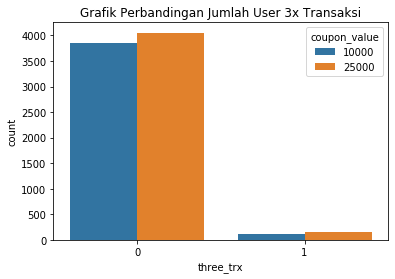

In [192]:
sns.countplot('three_trx', data = dfn , hue = 'coupon_value')
plt.title('Grafik Perbandingan Jumlah User 3x Transaksi')

Text(0.5, 1.0, 'Grafik Perbandingan Jumlah User 5x Transaksi')

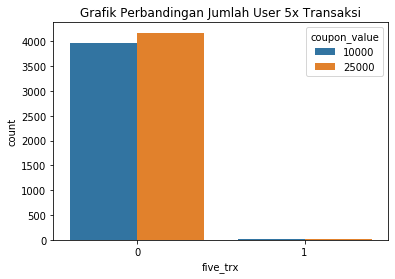

In [193]:
sns.countplot('five_trx', data = dfn , hue = 'coupon_value')
plt.title('Grafik Perbandingan Jumlah User 5x Transaksi')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

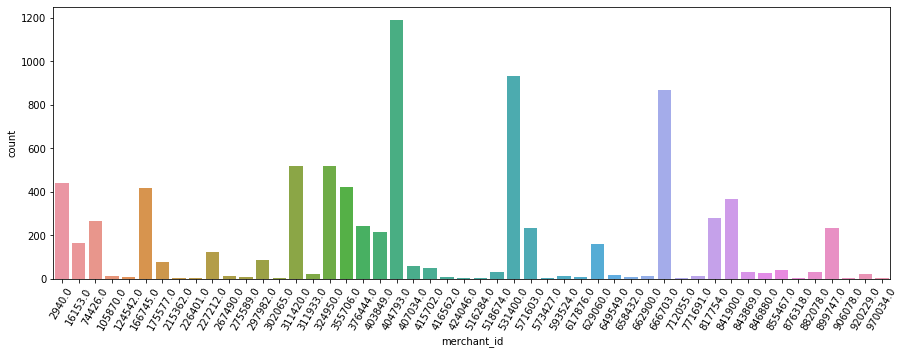

In [214]:
plt.figure(figsize=(15,5))
sns.countplot(x='merchant_id', data=dfn)
plt.xticks(rotation= 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

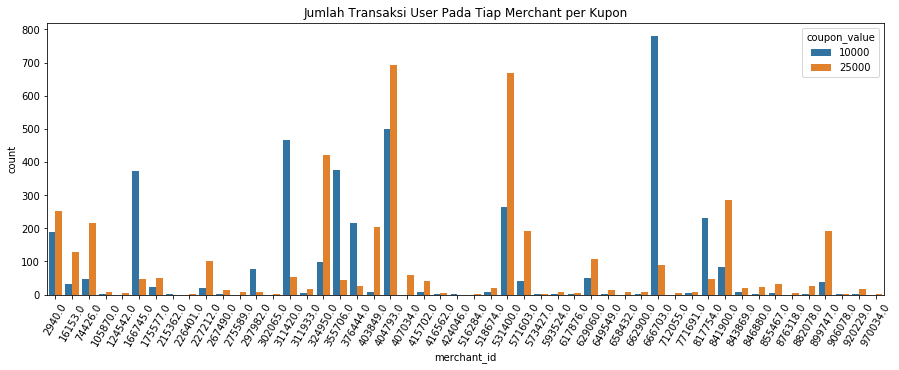

In [108]:
plt.figure(figsize=(15,5))
sns.countplot(x='merchant_id', data=dfn, hue='coupon_value')
plt.title('Jumlah Transaksi User Pada Tiap Merchant per Kupon')
plt.xticks(rotation= 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

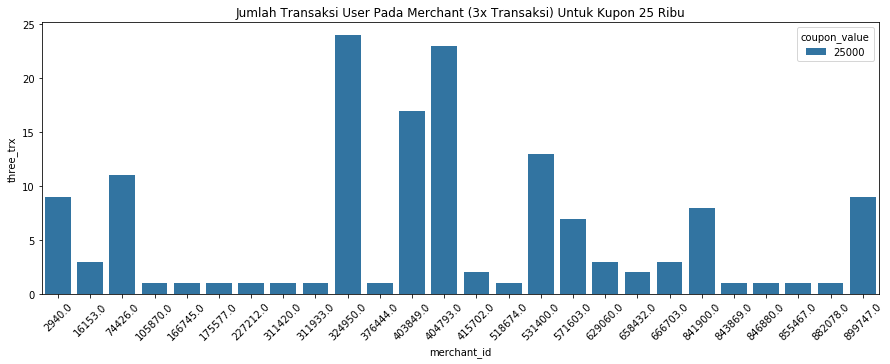

In [106]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'merchant_id' , y = 'three_trx' , hue = 'coupon_value' , data = merchant25k_3trx)
plt.title('Jumlah Transaksi User Pada Merchant (3x Transaksi) Untuk Kupon 25 Ribu')
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

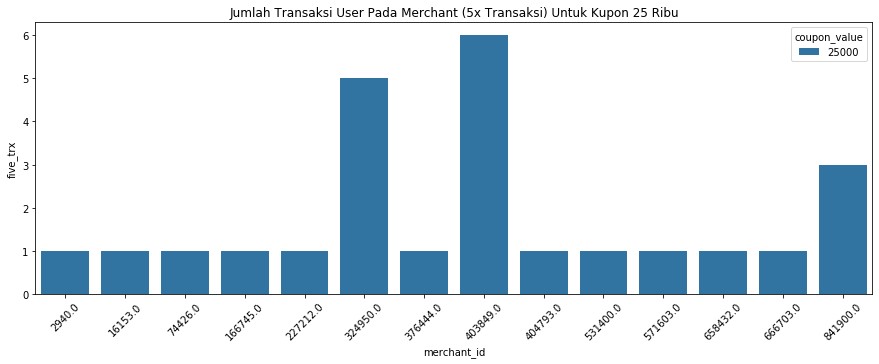

In [206]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'merchant_id' , y = 'five_trx' , hue = 'coupon_value' , data = merchant25k_5trx)
plt.title('Jumlah Transaksi User Pada Merchant (5x Transaksi) Untuk Kupon 25 Ribu')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

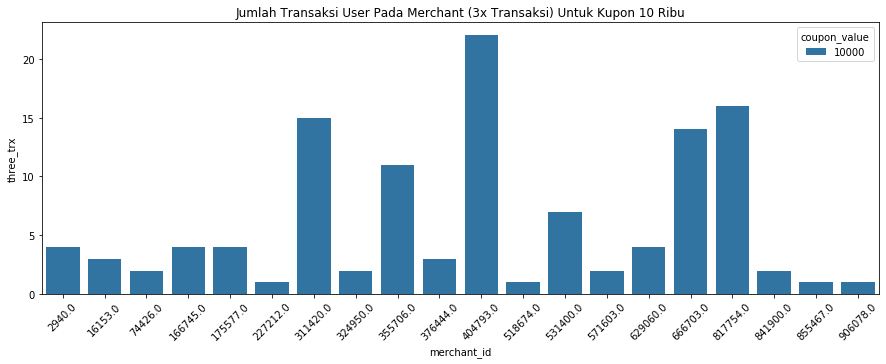

In [204]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'merchant_id' , y = 'three_trx' , hue = 'coupon_value' , data = merchant10k_3trx)
plt.title('Jumlah Transaksi User Pada Merchant (3x Transaksi) Untuk Kupon 10 Ribu')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

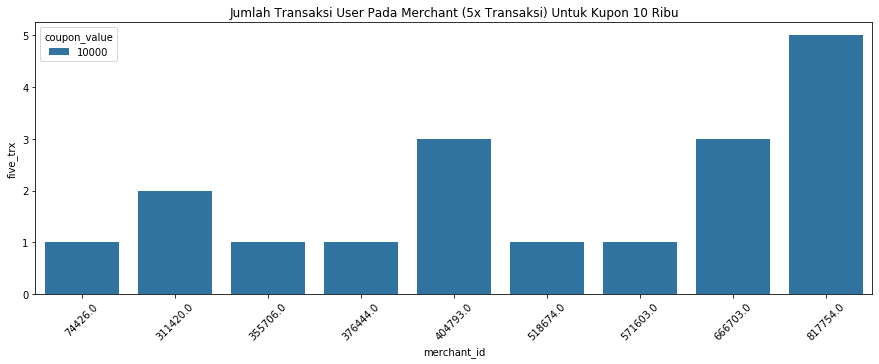

In [215]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'merchant_id' , y = 'five_trx' , hue = 'coupon_value' , data = merchant10k_5trx)
plt.title('Jumlah Transaksi User Pada Merchant (5x Transaksi) Untuk Kupon 10 Ribu')
plt.xticks(rotation=45)

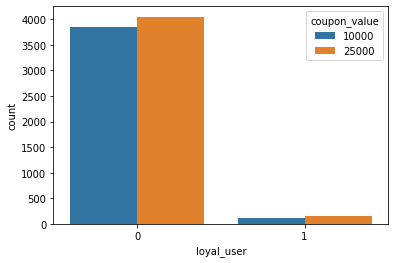

In [102]:
#Grafik Konversi Loyal User 
sns.countplot('loyal_user', hue = 'coupon_value',data = dfn)

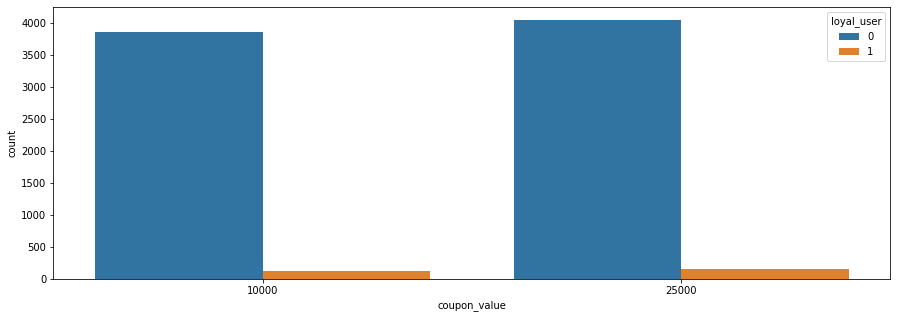

In [174]:
plt.figure(figsize=(15,5))
sns.countplot('coupon_value', hue='loyal_user', data = dfn)

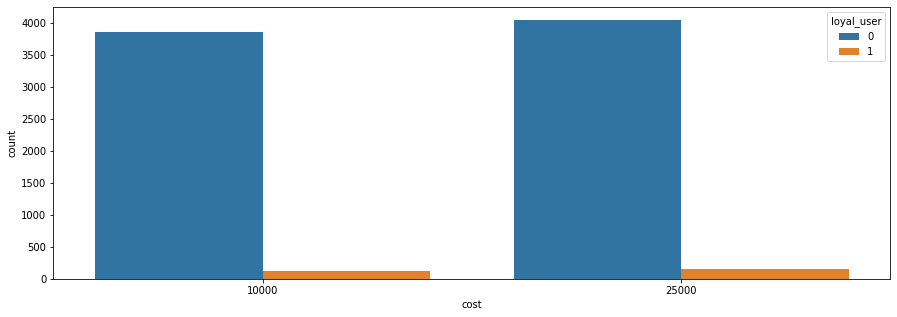

In [180]:
#perbandingan cost dengan konversi loyal user 
plt.figure(figsize=(15,5))
sns.countplot(x = 'cost', hue = 'loyal_user',data=dfn )

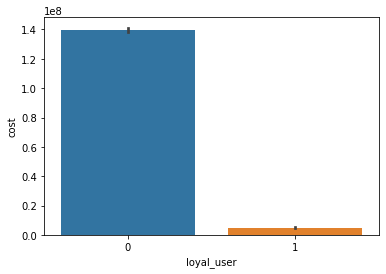

In [207]:
sns.barplot(x = 'loyal_user', y='cost', data=dfn, estimator=sum)

In [213]:
merchant10k_3trx

,merchant_id,coupon_value,three_trx
0,2940.0,10000,4
1,16153.0,10000,3
2,74426.0,10000,2
3,166745.0,10000,4
4,175577.0,10000,4
5,227212.0,10000,1
6,311420.0,10000,15
7,324950.0,10000,2
8,355706.0,10000,11
9,376444.0,10000,3
